In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
wavenumber = np.load(r'Data_preprocessed\wavenumber.npy')
name_list = ['s1', 's2_2_1', 's2_2_2', 's3', 's4_2_1', 's4_2_2']
def load_data(name: str):
    return np.load(fr'Data_preprocessed\{name}.npy'), np.load(fr'Data_preprocessed\{name}_snv.npy'), np.load(fr'Data_preprocessed\{name}_mask.npy')

In [3]:
data_list = []
data_snv_list = []
mask_list = []
for name in name_list:
    data, data_snv, mask = load_data(name)
    data_list.append(data)
    data_snv_list.append(data_snv)
    mask_list.append(mask)

10241 cm-1


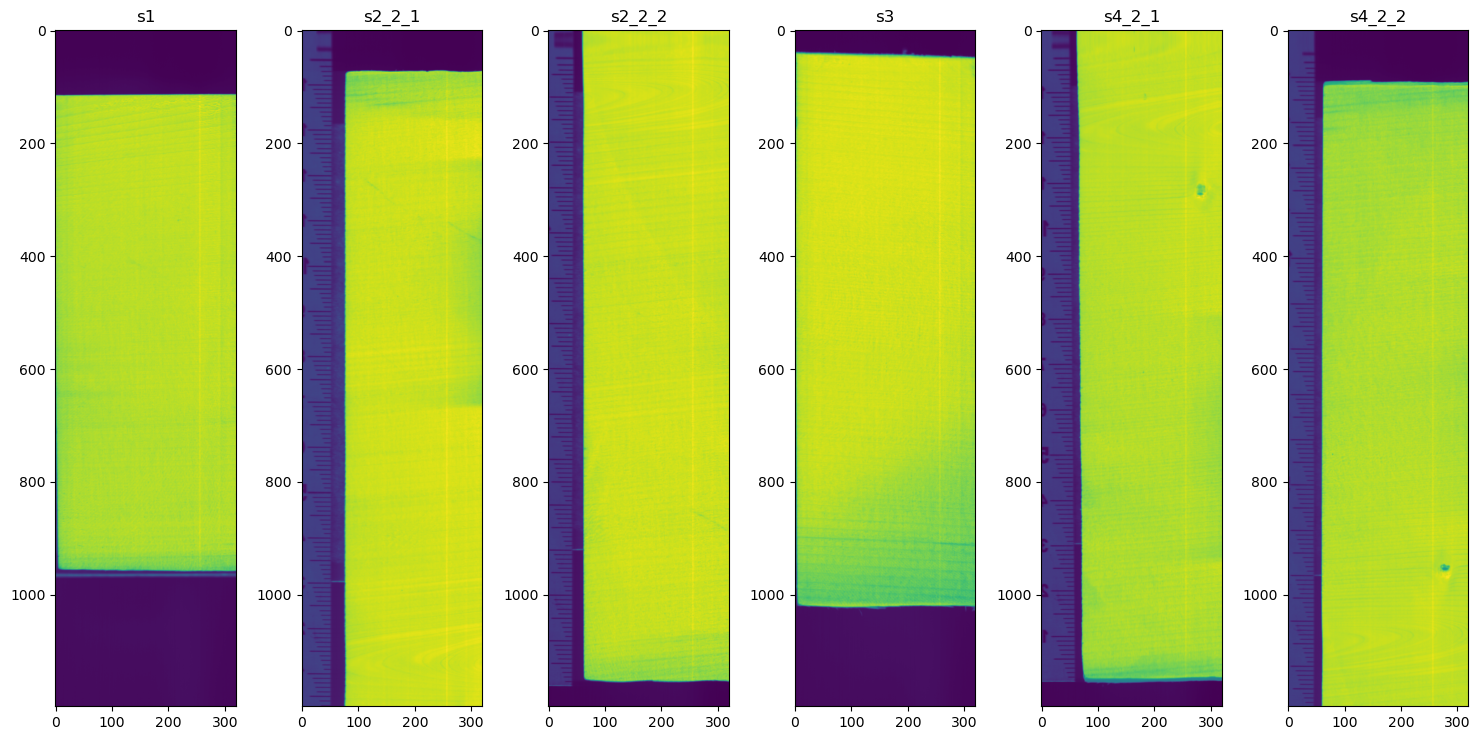

In [4]:
fig, ax = plt.subplots(1, 6, figsize=(15, 7.5))
ax = ax.flatten()
for i, name in enumerate(name_list):
    ax[i].imshow(data_list[i][:, :, 10])
    ax[i].set_title(fr'{name}')
plt.tight_layout();
print(f'{round(wavenumber[10])} cm-1')

In [5]:
sample_list = []
sample_snv_list = []
for i in range(6):
    data = data_list[i][mask_list[i] == 1]
    data_snv = data_snv_list[i][mask_list[i] == 1]
    sample_list.append(data)
    sample_snv_list.append(data_snv)

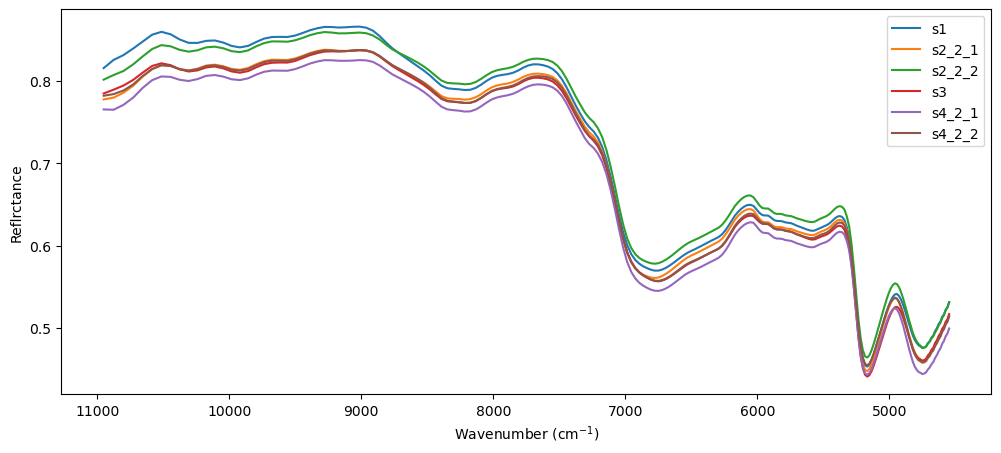

In [6]:
plt.figure(figsize=(12, 5))
for i, name in enumerate(name_list):
    plt.plot(wavenumber, sample_list[i].mean(axis=0), label=fr'{name}')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflrctance')
plt.gca().invert_xaxis()
plt.legend();

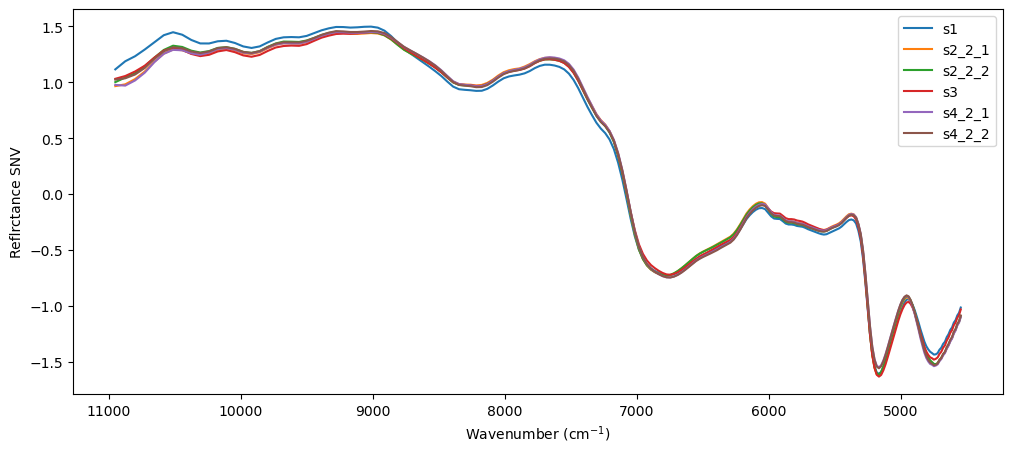

In [7]:
plt.figure(figsize=(12, 5))
for i, name in enumerate(name_list):
    plt.plot(wavenumber, sample_snv_list[i].mean(axis=0), label=fr'{name}')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflrctance SNV')
plt.gca().invert_xaxis()
plt.legend();

同じ試料からサンプリングされたのに、s1 だけスペクトルの形状が若干異なる

---

表面部分でのスペクトル変化を観察

In [8]:
s3 = data_list[4]
s3_snv = data_snv_list[4]

In [9]:
inner = s3[100:200, 100:200, :].reshape(-1, 205).mean(axis=0)
surface = s3[1000:1005, 200:300, :].reshape(-1, 205).mean(axis=0)
inner_snv = s3_snv[100:200, 100:200, :].reshape(-1, 205).mean(axis=0)
surface_snv = s3_snv[1000:1005, 200:300, :].reshape(-1, 205).mean(axis=0)

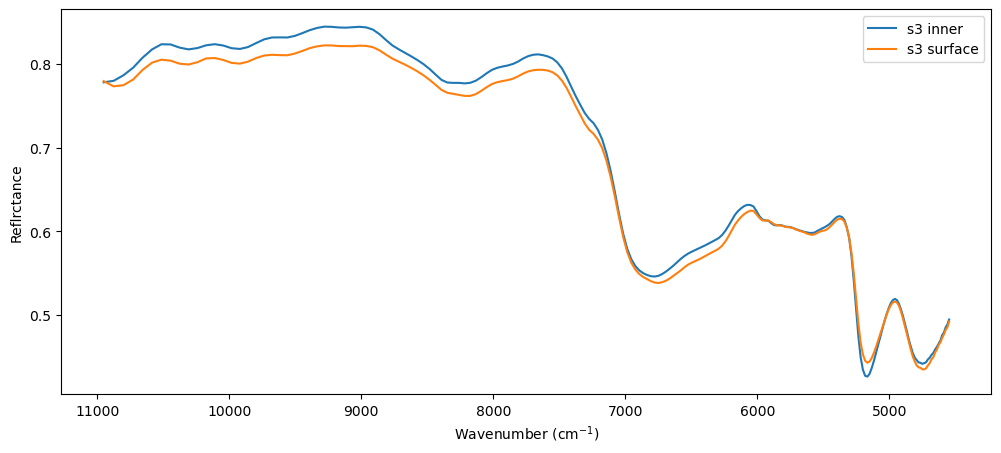

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(wavenumber, inner, label='s3 inner')
plt.plot(wavenumber, surface, label='s3 surface')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflrctance')
plt.gca().invert_xaxis()
plt.legend(loc='upper right')
plt.show()

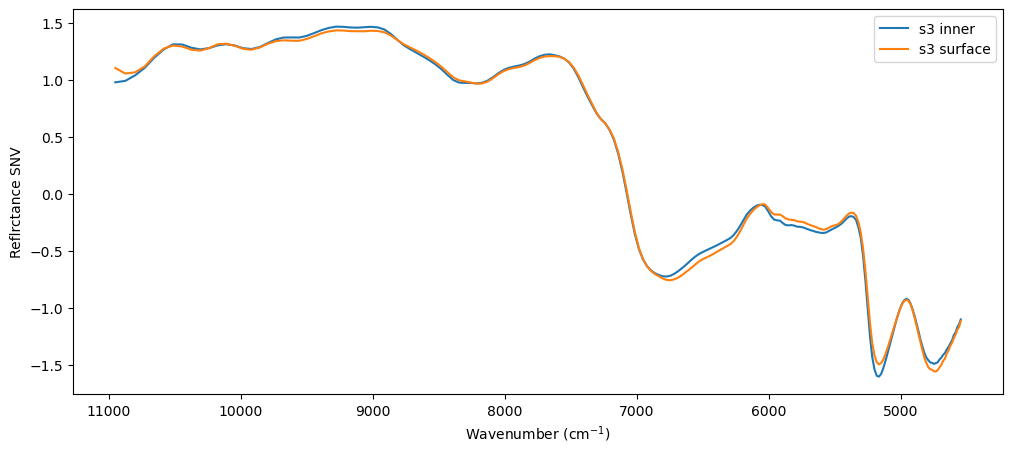

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(wavenumber, inner_snv, label='s3 inner')
plt.plot(wavenumber, surface_snv, label='s3 surface')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflrctance SNV')
plt.gca().invert_xaxis()
plt.legend(loc='upper right')
plt.show()

うーん...あまり変化がない